In [4]:
# USDC, WBTC, ETH
N_COINS = 3
PRECISION = 1e18

D = 29047349899039352915342907
balances = [9835488234445, 14938821663, 2811863139959144531319]
precisions = [1e12, 1e10, 1]
price_scale = [66266853956842562806222, 3465399375853261468310]

xp = [b for b in balances]

xp[0] *= precisions[0]
for k in range(1, N_COINS):
    xp[k] = xp[k] * price_scale[k - 1] * precisions[k] / PRECISION

for x in xp:
    print(x / 1e18)

def get_xcp(D, prices):
    N = 3
    x = [0, 0, 0]
    x[0] = D / N

    for i in range(1, N):
        x[i] = D * 10**18 / (N * prices[i - 1])

    return (x[0] * x[1] * x[2]) ** (1/N)

get_xcp(D, price_scale) / 1e18

9835488.234445
9899487.13429337
9744228.770199211


15811.341284314029

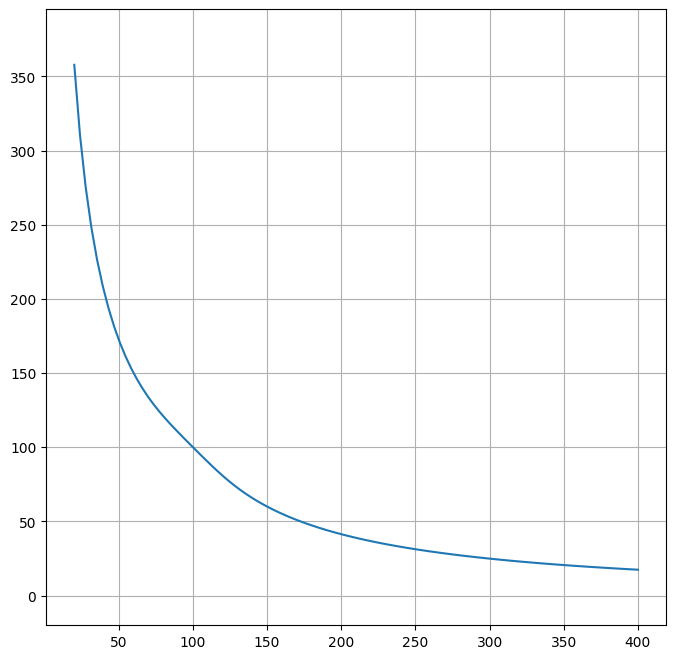

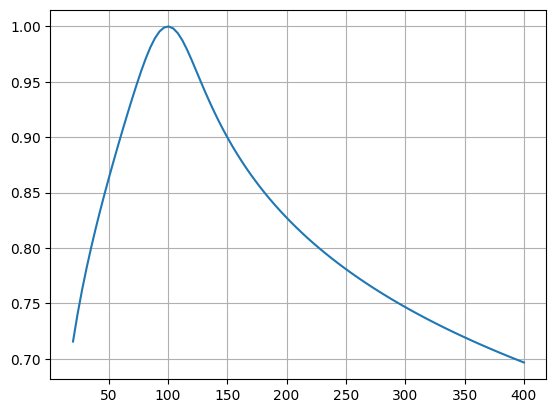

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

D = 200
A = 5
g = 0.05

def f_curve_v2(y, x, A, D, g):
    k0 = x*y/(D/2)**2
    k = A*k0*g**2/(g+1-k0)**2
    return x*y + k*D*(x+y) - (D/2)**2 - k*D**2

xs = np.linspace(20, 400, 100)
ys = [fsolve(f_curve_v2, (D/2)**2, args=(x, A, D, g))[0] for x in xs]

plt.figure(figsize=(8, 8)) 
plt.axis('equal')

plt.plot(xs, ys)

plt.grid(True)
plt.show()

xys = zip(xs, ys)
zs = [x*y/(D/2)**2 for (x, y) in xys]

plt.plot(xs, zs)
plt.grid(True)
plt.show()